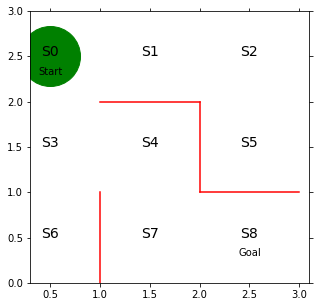

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1,1],[0,1],color='red')
plt.plot([1,2],[2,2],color='red')
plt.plot([2,2],[2,1],color='red')
plt.plot([2,3],[1,1],color='red')

cnt = 0
for y in range(3,0,-1):
    for x in range(1,4,1):
        plt.text(x-0.5,y-0.5,'S{}'.format(cnt),size = 14,ha='center')
        cnt+=1

plt.text(0.5,2.3,"Start",ha = 'center')
plt.text(2.5,0.3,"Goal",ha = 'center')

ax.set_xlim(0.3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',
               labelbottom='off',right='off',left='off',labelleft='off')

line, = ax.plot([0.5],[2.5],marker = 'o',color = 'g',markersize = 60)

theta_0 = np.array([[np.nan,1,1,np.nan], #s0
                    [np.nan,1,np.nan,1], #s1
                    [np.nan,np.nan,1,1],
                    [1,1,1,np.nan],
                    [np.nan,np.nan,1,1],
                    [1,np.nan,np.nan,np.nan],
                    [1,np.nan,np.nan,np.nan],
                    [1,1,np.nan,np.nan],
                   ])

In [41]:
#设置初始的动作价值函数
[a,b] = theta_0.shape
Q = np.random.rand(a,b) * theta_0

#将策略参数 theta0 转换为随机策略

def simple_conv_into_pi_from_theta(theta):
    
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i,:] = theta[i,:] / np.nansum(theta[i,:])
        
    pi = np.nan_to_num(pi)
    return pi

#求取随机行动策略 pi_0

pi_0 = simple_conv_into_pi_from_theta(theta_0)

#ε-贪婪法
def get_action(s,Q,eps,pi):
    di = ["u","r","d","l"]
    
    if np.random.rand()<eps:
        next_di = np.random.choice(di,p = pi[s,:])
    else:
        next_di  = di[np.nanargmax(Q[s,:])]
        
    if next_di == "u":
        action = 0
    elif next_di == "r":
        action = 1
    elif next_di == "d":
        action = 2
    else :
        action = 3
    
    return action

def get_s_next(s, a, Q, eps, pi):
    di = ["u","r","d","l"]
    
   # print("now a is "+ str(a))
    
    next_di = di[a]
    
    if next_di == "u":
        sn = s-3
    elif next_di == "r":
        sn = s+1
    elif next_di == "d":
        sn = s+3
    elif next_di == "l":
        sn = s-1
    
    return sn

    

In [42]:
#sarsa 的动作价值函数Q
def Sarsa(s,a,r,s_next,a_next,Q,eta,gamma):
    if s_next ==8:
        Q[s,a] = Q[s,a]+eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta*(r+gamma*Q[s_next,a_next]-Q[s,a])
        
    return Q


In [46]:
#定义基于Sarsa 求解迷宫为的函数， 输出装调、动作的历史记录录以及更新后的Q
def goal_maze_ret_s_a_Q(Q, eps, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, eps, pi)
    s_a_history = [[0,np.nan]]
    print("hao\n")
    while(1):
        a = a_next
        
        s_a_history[-1][1] = a
      #  print("cao 这个a是"+str(a))
        s_next = get_s_next(s, a, Q, eps, pi) #根据当前的a走到t+1时
        s_a_history.append([s_next,np.nan])
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, eps, pi)
        
        
        Q = Q_learning(s,a,r,s_next,Q,eta,gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
        
    return [s_a_history, Q]
            
        

In [44]:
#主程序
eta = 0.1
gamma = 0.9
eps = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print("当前回合："+ str(episode))
    
    eps = eps/2 #eps-greedy 逐渐减少
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, eps, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q,axis=1)
    print(np.sum(np.abs(new_v-v)))
    v = new_v
    
    print("用了步数："+str(len(s_a_history)-1))
    
    episode += 1
    if episode>100:
        break
    

当前回合：1
hao

0.43338008845392956
用了步数：40
当前回合：2
hao

0.336198490866968
用了步数：80
当前回合：3
hao

0.09843334598353926
用了步数：38
当前回合：4
hao

0.0534743697492705
用了步数：6
当前回合：5
hao

0.04890431748346585
用了步数：4
当前回合：6
hao

0.050213091766907914
用了步数：6
当前回合：7
hao

0.04508893961185889
用了步数：4
当前回合：8
hao

0.04280879622011152
用了步数：4
当前回合：9
hao

0.04204916333429887
用了步数：4
当前回合：10
hao

0.04155048635372194
用了步数：4
当前回合：11
hao

0.04096096960254236
用了步数：4
当前回合：12
hao

0.04028282287697216
用了步数：4
当前回合：13
hao

0.03952061223256298
用了步数：4
当前回合：14
hao

0.03868059811947899
用了步数：4
当前回合：15
hao

0.037770197132890815
用了步数：4
当前回合：16
hao

0.03679754799831125
用了步数：4
当前回合：17
hao

0.03577116515868772
用了步数：4
当前回合：18
hao

0.03469966571280192
用了步数：4
当前回合：19
hao

0.03359155751905124
用了步数：4
当前回合：20
hao

0.03245507806540765
用了步数：4
当前回合：21
hao

0.03129807525079492
用了步数：4
当前回合：22
hao

0.030127922556363762
用了步数：4
当前回合：23
hao

0.028951462234525827
用了步数：4
当前回合：24
hao

0.027774971132969117
用了步数：4
当前回合：25
hao

0.026604144621203252
用了步数：4
当前回

In [50]:
def Q_learning(s,a,r,s_next,Q,eta,gamma):
    if s_next == 8:
        Q[s,a] = Q[s,a]+ eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a]+ eta*(r+np.nanmax(Q[s_next,:]) - Q[s,a])
    
    return Q

In [51]:
#Q-learning主程序
[a,b] = theta_0.shape
Q = np.random.rand(a,b) * theta_0 * 0.1

eta = 0.1
gamma = 0.9
eps = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = [] # 每回合状态价值
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print("回合数："+ str(episode))
    eps /= 2
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q,eps,eta,gamma,pi_0)
    
    new_v = np.nanmax(Q,axis =1)
    print("状态价值的变化："+str(np.sum(np.abs(new_v - v))))
    
    v = new_v
    V.append(v)
    
    print("需要步数："+str(len(s_a_history)-1))
    
    episode+=1
    if episode > 100:
        break
        

回合数：1
hao

状态价值的变化：0.10034978107421201
需要步数：662
回合数：2
hao

状态价值的变化：0.08993045974754615
需要步数：40
回合数：3
hao

状态价值的变化：0.08101814568337207
需要步数：26
回合数：4
hao

状态价值的变化：0.07674108916119425
需要步数：50
回合数：5
hao

状态价值的变化：0.09374423226328131
需要步数：8
回合数：6
hao

状态价值的变化：0.09330860214507508
需要步数：4
回合数：7
hao

状态价值的变化：0.09329871535953206
需要步数：4
回合数：8
hao

状态价值的变化：0.09325922003410911
需要步数：4
回合数：9
hao

状态价值的变化：0.09316492372499818
需要步数：4
回合数：10
hao

状态价值的变化：0.09299319616523483
需要步数：4
回合数：11
hao

状态价值的变化：0.09272457536342756
需要步数：4
回合数：12
hao

状态价值的变化：0.09234308126301356
需要步数：4
回合数：13
hao

状态价值的变化：0.09183630984244419
需要步数：4
回合数：14
hao

状态价值的变化：0.09119536625029762
需要步数：4
回合数：15
hao

状态价值的变化：0.09041468373379535
需要步数：4
回合数：16
hao

状态价值的变化：0.08949176534912064
需要步数：4
回合数：17
hao

状态价值的变化：0.08842687740882937
需要步数：4
回合数：18
hao

状态价值的变化：0.08722271704598644
需要步数：4
回合数：19
hao

状态价值的变化：0.08588407091893294
需要步数：4
回合数：20
hao

状态价值的变化：0.08441747774325284
需要步数：4
回合数：21
hao

状态价值的变化：0.08283090384785977
需要步数：4
回合数：22
hao

状态价值的